# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [2]:
import numpy as np

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import inauguralproject

from scipy import optimize

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# Question 1

We define the economic model by the 4 equations. Eq. (1) computes the utility of the household. Eq. (2) computes the public assesment for the household. Eq. (3) computes the cash on hand for the household and eq. (4) computes the  total cost of housing. We also define a function which describes the choice of consumption for the household. This function is described by the the constraints and functions. Finally we define an objective function which needs to be minimized. 

In [3]:
# Global variables
m = 0.5

# Dictionary of exogenous variables
param_dict = {'phi' : 0.3,
              'epsilon' : 0.5,
              'r' : 0.03,
              'tau_g' : 0.012,
              'tau_p' : 0.004,
              'p_bar' : 3
             }

# Eq. (1) - Utility function with dictionary
def utility_function(c, h, param_dict):
    return (c**(1-param_dict['phi']))*(h**param_dict['phi'])

# Eq. (2)
def public_assesment(h, param_dict):
    return h*param_dict['epsilon']

# Eq. (4)
def cost_of_housing(h, param_dict):
    return param_dict['r']*h + param_dict['tau_g']*public_assesment(h, param_dict) + param_dict['tau_p']*max(public_assesment(h, param_dict) - param_dict['p_bar'],0)

# Eq. (3)
def cash_on_hand(h, m, cost_of_housing, param_dict):
    return m - cost_of_housing(h, param_dict) 

# Calculate the choice of consumption using the constraints and the functions defined
def value_of_choice(h, m, param_dict):
    c = m - cost_of_housing(h, param_dict) 
    return - utility_function(c, h, param_dict)

# Solution using scipy optmize
def res(m, param_dict):
    return optimize.minimize_scalar(value_of_choice, args = (m, param_dict), bounds = None)

# Unpack results
h_best_scipy = res(m, param_dict).x
value_of_choice_best_scipy = - res(m, param_dict).fun
c_best_scipy = cash_on_hand(h_best_scipy, m, cost_of_housing, param_dict)

# Print
print(f'The maximized (- minimized) utility is : {value_of_choice_best_scipy:.3f}')
print(f'The optimal amount of consumption is : {c_best_scipy:.3f}')
print(f'The optimal amount of housing is : {h_best_scipy:.3f}')

The maximized (- minimized) utility is : 0.736
The optimal amount of consumption is : 0.350
The optimal amount of housing is : 4.167


# Question 2

We plot the optimal consumption $c^*$ and housing $h^*$ as functions of m.

We create a for loop where the model is solved for different levels of m. We create a plot of the variables as functions of m in two separate figures. 

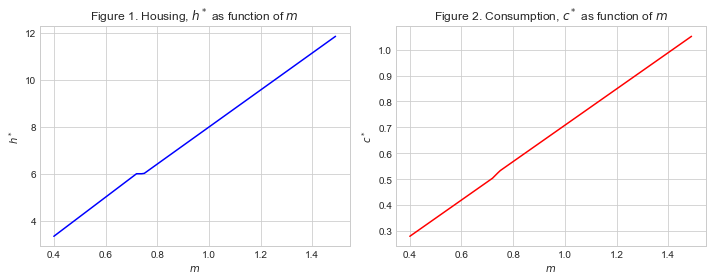

In [4]:
# List of the values of c, h and m
m_list = []
c_list = []
h_list = []

# Creating a for loop and solve for different values of m 
for m in np.arange(0.4, 1.5, 0.01):
    h_best_scipy = res(m, param_dict).x
    c_best_scipy = cash_on_hand(h_best_scipy, m, cost_of_housing, param_dict)
    c_list.append(c_best_scipy)
    h_list.append(h_best_scipy)
    m_list.append(m)

# Plotting the figures of c and h as functions of m 

# Figure 1
fig = plt.figure(figsize = (10,4))
ax_left = fig.add_subplot(1,2,1)

ax_left.plot(m_list,h_list, color = 'blue')

ax_left.set_title('Figure 1. Housing, $h^*$ as function of $m$')
ax_left.set_xlabel('$m$')
ax_left.set_ylabel('$h^*$')
ax_left.grid(True)


# Figure 2
ax_right = fig.add_subplot(1,2,2)

ax_right.plot(m_list,c_list, color = 'red')

ax_right.set_title('Figure 2. Consumption, $c^*$ as function of $m$')
ax_right.set_xlabel('$m$')
ax_right.set_ylabel('$c^*$')
ax_right.grid(True)
plt.tight_layout()

# Question 3

ADD ANSWER.

In [4]:
# code

# Question 4

ADD ANSWER.

In [5]:
# code

# Question 5

ADD ANSWER.

In [6]:
# code

# Conclusion

ADD CONCISE CONLUSION.